<a href="https://colab.research.google.com/github/GilangPutra14/tubes_PCVK/blob/main/tubes_pcvk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt



(<matplotlib.axes._subplots.AxesSubplot at 0x7f1a2c7036d0>,
 <matplotlib.image.AxesImage at 0x7f1a2c58f790>)

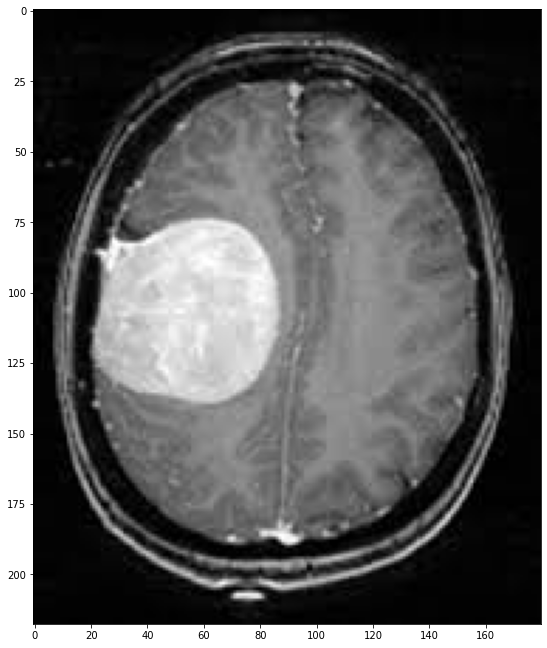

In [ ]:
filename = ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y1.jpg')

img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))

pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)


# masih Menngunakan 3 cluster
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)


#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)

plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)


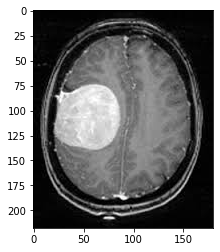

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y1.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(img_gray, cmap='gray')
plt.show()


   

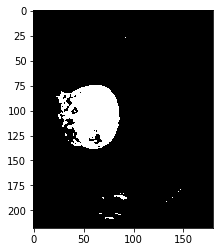

In [6]:
ret, img_binary = cv2.threshold(img,200,255, cv2.THRESH_BINARY)
plt.imshow(img_binary)
plt.show()

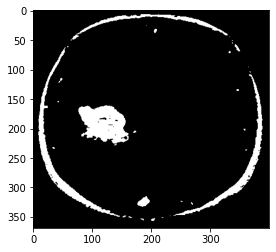

In [7]:
img = cv.imread ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y11.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(img_gray, cmap='gray')

ret, img_binary = cv2.threshold(img,200,255, cv2.THRESH_BINARY)
plt.imshow(img_binary)
plt.show()

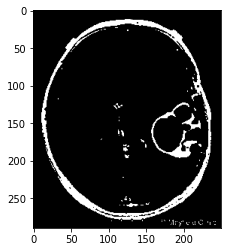

In [19]:
img = cv.imread ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y73.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(img_gray, cmap='gray')

ret, img_binary = cv2.threshold(img,200,255, cv2.THRESH_BINARY)
plt.imshow(img_binary)
plt.show()

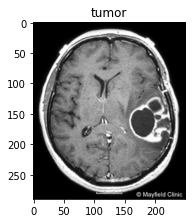

In [11]:
img = cv.imread ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y73.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

plt.subplot(121),plt.imshow(img), plt.title('tumor')
plt.show()

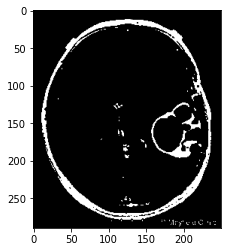

In [20]:
img = cv.imread ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y73.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img_gray, cmap='gray')

ret, img_binary = cv2.threshold(img,200,255, cv2.THRESH_BINARY)
plt.imshow(img_binary)
plt.show()